In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import matplotlib.pyplot as plt
import pickle

In [4]:
df = pd.read_csv("StudentsPerformance.csv") #reading of the data
df

,GENDER,RACE/ETHNICITY,PARENTAL LEVEL OF EDUCATION,LUNCH,TEST PREPARATION COURSE,MATHS SCORE,READING SCORE,WRITING SCORE
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.columns

Index(['GENDER', 'RACE/ETHNICITY', 'PARENTAL LEVEL OF EDUCATION', 'LUNCH',
       'TEST PREPARATION COURSE', 'MATHS SCORE', 'READING SCORE',
       'WRITING SCORE'],
      dtype='object')

In [6]:
#checking/identifying unique names of column
for i in df.columns:
    print(df[i].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68  66  62  76
  

In [7]:
df.dtypes

GENDER                         object
RACE/ETHNICITY                 object
PARENTAL LEVEL OF EDUCATION    object
LUNCH                          object
TEST PREPARATION COURSE        object
MATHS SCORE                     int64
READING SCORE                   int64
WRITING SCORE                   int64
dtype: object

In [8]:
#creating a list for gender
GENDER = {
    'male':1,
    'female':0
}

In [9]:
#mapping the list into the data
df['GENDER']=df['GENDER'].map(GENDER)
df

,GENDER,RACE/ETHNICITY,PARENTAL LEVEL OF EDUCATION,LUNCH,TEST PREPARATION COURSE,MATHS SCORE,READING SCORE,WRITING SCORE
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,standard,completed,88,99,95
996,1,group C,high school,free/reduced,none,62,55,55
997,0,group C,high school,free/reduced,completed,59,71,65
998,0,group D,some college,standard,completed,68,78,77


In [10]:
df = pd.get_dummies(df,drop_first=True) #performing one hot encoding on categorical varaibles 
df

,GENDER,MATHS SCORE,READING SCORE,WRITING SCORE,RACE/ETHNICITY_group B,RACE/ETHNICITY_group C,RACE/ETHNICITY_group D,RACE/ETHNICITY_group E,PARENTAL LEVEL OF EDUCATION_bachelor's degree,PARENTAL LEVEL OF EDUCATION_high school,PARENTAL LEVEL OF EDUCATION_master's degree,PARENTAL LEVEL OF EDUCATION_some college,PARENTAL LEVEL OF EDUCATION_some high school,LUNCH_standard,TEST PREPARATION COURSE_none
0,0,72,72,74,True,False,False,False,True,False,False,False,False,True,True
1,0,69,90,88,False,True,False,False,False,False,False,True,False,True,False
2,0,90,95,93,True,False,False,False,False,False,True,False,False,True,True
3,1,47,57,44,False,False,False,False,False,False,False,False,False,False,True
4,1,76,78,75,False,True,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,88,99,95,False,False,False,True,False,False,True,False,False,True,False
996,1,62,55,55,False,True,False,False,False,True,False,False,False,False,True
997,0,59,71,65,False,True,False,False,False,True,False,False,False,False,False
998,0,68,78,77,False,False,True,False,False,False,False,True,False,True,False


In [11]:
df.corr() #checking if the variables are correlated

,GENDER,MATHS SCORE,READING SCORE,WRITING SCORE,RACE/ETHNICITY_group B,RACE/ETHNICITY_group C,RACE/ETHNICITY_group D,RACE/ETHNICITY_group E,PARENTAL LEVEL OF EDUCATION_bachelor's degree,PARENTAL LEVEL OF EDUCATION_high school,PARENTAL LEVEL OF EDUCATION_master's degree,PARENTAL LEVEL OF EDUCATION_some college,PARENTAL LEVEL OF EDUCATION_some high school,LUNCH_standard,TEST PREPARATION COURSE_none
GENDER,1.000000,0.167982,-0.244313,-0.301225,-0.028466,-0.063368,0.030566,0.020302,-0.011638,0.037952,-0.046188,-0.004460,0.008990,0.021372,-0.006028
MATHS SCORE,0.167982,1.000000,0.817580,0.802642,-0.084250,-0.073387,0.050071,0.205855,0.079664,-0.128725,0.060417,0.037056,-0.079852,0.350877,-0.177702
READING SCORE,-0.244313,0.817580,1.000000,0.954598,-0.060283,-0.003074,0.035177,0.106712,0.096024,-0.151068,0.106452,0.010782,-0.071369,0.229560,-0.241780
WRITING SCORE,-0.301225,0.802642,0.954598,1.000000,-0.078254,-0.010203,0.082032,0.089077,0.128297,-0.182211,0.125693,0.027989,-0.097326,0.245769,-0.312946
RACE/ETHNICITY_group B,-0.028466,-0.084250,-0.060283,-0.078254,1.000000,-0.331479,-0.288574,-0.195411,-0.019121,0.069093,-0.056363,-0.036203,0.026531,-0.008257,0.000106
RACE/ETHNICITY_group C,-0.063368,-0.073387,-0.003074,-0.010203,-0.331479,1.000000,-0.407797,-0.276145,0.015682,0.007977,0.001630,-0.015872,-0.045339,-0.003385,-0.012522
RACE/ETHNICITY_group D,0.030566,0.050071,0.035177,0.082032,-0.288574,-0.407797,1.000000,-0.240402,-0.020556,-0.042118,0.072793,0.042347,0.018402,-0.009458,0.055956
RACE/ETHNICITY_group E,0.020302,0.205855,0.106712,0.089077,-0.195411,-0.276145,-0.240402,1.000000,0.013221,-0.039494,-0.003180,0.023153,-0.053075,0.052398,-0.059393
PARENTAL LEVEL OF EDUCATION_bachelor's degree,-0.011638,0.079664,0.096024,0.128297,-0.019121,0.015682,-0.020556,0.013221,1.000000,-0.180595,-0.091588,-0.197647,-0.170790,-0.013668,-0.024285
PARENTAL LEVEL OF EDUCATION_high school,0.037952,-0.128725,-0.151068,-0.182211,0.069093,0.007977,-0.042118,-0.039494,-0.180595,1.000000,-0.123632,-0.266799,-0.230545,-0.002211,0.074446


In [12]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


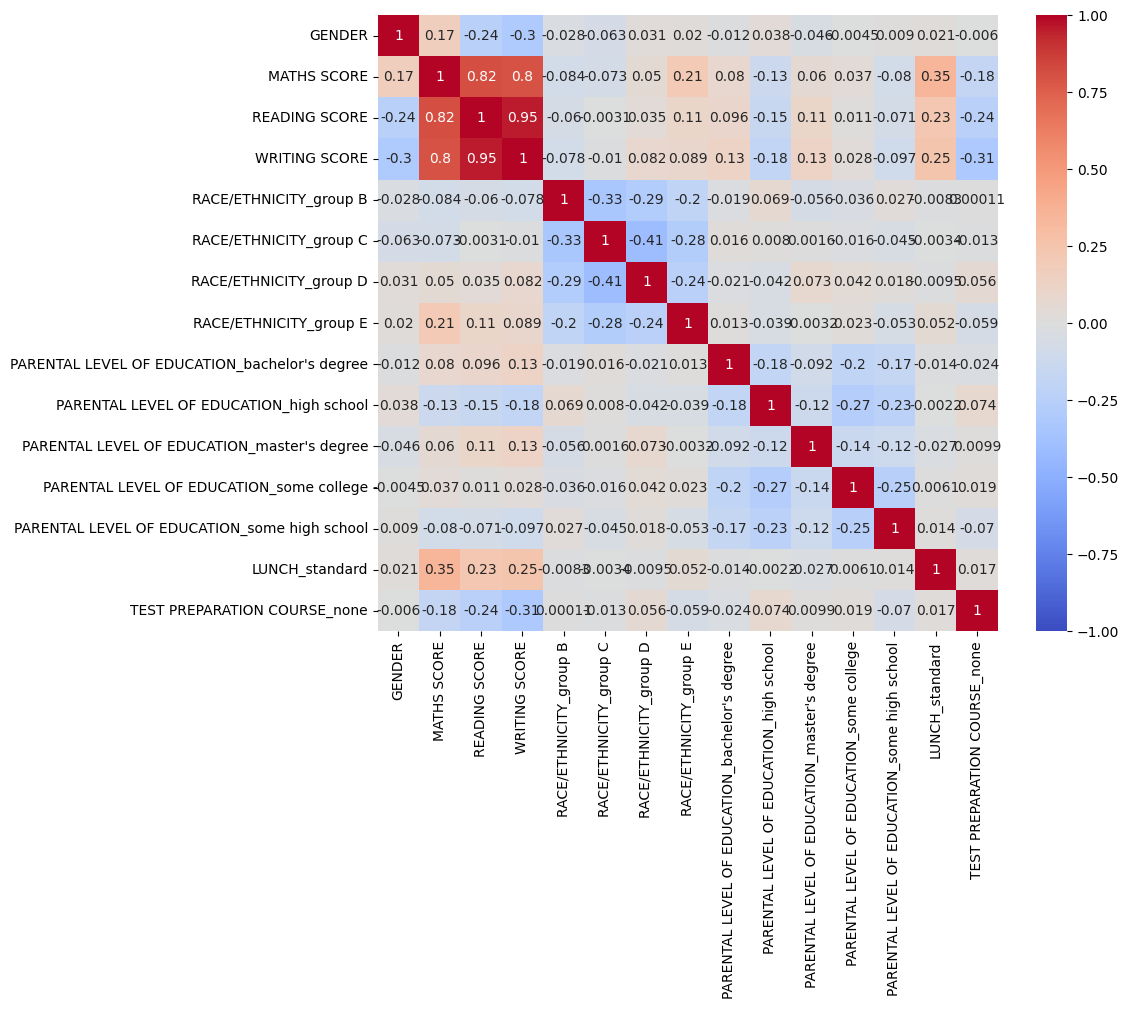

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix=df.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Display the heatmap
plt.show()

In [14]:
#checking for missing values in dataset
df.isnull().sum()

GENDER                                           0
MATHS SCORE                                      0
READING SCORE                                    0
WRITING SCORE                                    0
RACE/ETHNICITY_group B                           0
RACE/ETHNICITY_group C                           0
RACE/ETHNICITY_group D                           0
RACE/ETHNICITY_group E                           0
PARENTAL LEVEL OF EDUCATION_bachelor's degree    0
PARENTAL LEVEL OF EDUCATION_high school          0
PARENTAL LEVEL OF EDUCATION_master's degree      0
PARENTAL LEVEL OF EDUCATION_some college         0
PARENTAL LEVEL OF EDUCATION_some high school     0
LUNCH_standard                                   0
TEST PREPARATION COURSE_none                     0
dtype: int64

In [15]:
df['TOTAL SCORE']=(df['MATHS SCORE']+df['READING SCORE']+df['WRITING SCORE']) #creating a new column total score
df

,GENDER,MATHS SCORE,READING SCORE,WRITING SCORE,RACE/ETHNICITY_group B,RACE/ETHNICITY_group C,RACE/ETHNICITY_group D,RACE/ETHNICITY_group E,PARENTAL LEVEL OF EDUCATION_bachelor's degree,PARENTAL LEVEL OF EDUCATION_high school,PARENTAL LEVEL OF EDUCATION_master's degree,PARENTAL LEVEL OF EDUCATION_some college,PARENTAL LEVEL OF EDUCATION_some high school,LUNCH_standard,TEST PREPARATION COURSE_none,TOTAL SCORE
0,0,72,72,74,True,False,False,False,True,False,False,False,False,True,True,218
1,0,69,90,88,False,True,False,False,False,False,False,True,False,True,False,247
2,0,90,95,93,True,False,False,False,False,False,True,False,False,True,True,278
3,1,47,57,44,False,False,False,False,False,False,False,False,False,False,True,148
4,1,76,78,75,False,True,False,False,False,False,False,True,False,True,True,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,88,99,95,False,False,False,True,False,False,True,False,False,True,False,282
996,1,62,55,55,False,True,False,False,False,True,False,False,False,False,True,172
997,0,59,71,65,False,True,False,False,False,True,False,False,False,False,False,195
998,0,68,78,77,False,False,True,False,False,False,False,True,False,True,False,223


In [16]:
#adding a new column called average_score and calculating the average score 
df['AVERAGE SCORE']=(df['MATHS SCORE']+df['READING SCORE']+df['WRITING SCORE'])/3
df

,GENDER,MATHS SCORE,READING SCORE,WRITING SCORE,RACE/ETHNICITY_group B,RACE/ETHNICITY_group C,RACE/ETHNICITY_group D,RACE/ETHNICITY_group E,PARENTAL LEVEL OF EDUCATION_bachelor's degree,PARENTAL LEVEL OF EDUCATION_high school,PARENTAL LEVEL OF EDUCATION_master's degree,PARENTAL LEVEL OF EDUCATION_some college,PARENTAL LEVEL OF EDUCATION_some high school,LUNCH_standard,TEST PREPARATION COURSE_none,TOTAL SCORE,AVERAGE SCORE
0,0,72,72,74,True,False,False,False,True,False,False,False,False,True,True,218,72.666667
1,0,69,90,88,False,True,False,False,False,False,False,True,False,True,False,247,82.333333
2,0,90,95,93,True,False,False,False,False,False,True,False,False,True,True,278,92.666667
3,1,47,57,44,False,False,False,False,False,False,False,False,False,False,True,148,49.333333
4,1,76,78,75,False,True,False,False,False,False,False,True,False,True,True,229,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,88,99,95,False,False,False,True,False,False,True,False,False,True,False,282,94.000000
996,1,62,55,55,False,True,False,False,False,True,False,False,False,False,True,172,57.333333
997,0,59,71,65,False,True,False,False,False,True,False,False,False,False,False,195,65.000000
998,0,68,78,77,False,False,True,False,False,False,False,True,False,True,False,223,74.333333


In [17]:
df.columns #checking the new columns of the dataset

Index(['GENDER', 'MATHS SCORE', 'READING SCORE', 'WRITING SCORE',
       'RACE/ETHNICITY_group B', 'RACE/ETHNICITY_group C',
       'RACE/ETHNICITY_group D', 'RACE/ETHNICITY_group E',
       'PARENTAL LEVEL OF EDUCATION_bachelor's degree',
       'PARENTAL LEVEL OF EDUCATION_high school',
       'PARENTAL LEVEL OF EDUCATION_master's degree',
       'PARENTAL LEVEL OF EDUCATION_some college',
       'PARENTAL LEVEL OF EDUCATION_some high school', 'LUNCH_standard',
       'TEST PREPARATION COURSE_none', 'TOTAL SCORE', 'AVERAGE SCORE'],
      dtype='object')

In [18]:
y = df['MATHS SCORE'] # dependent variable
x = df[["GENDER", "READING SCORE","WRITING SCORE","RACE/ETHNICITY_group B","RACE/ETHNICITY_group C","RACE/ETHNICITY_group D","RACE/ETHNICITY_group E","PARENTAL LEVEL OF EDUCATION_bachelor's degree","PARENTAL LEVEL OF EDUCATION_high school","PARENTAL LEVEL OF EDUCATION_master's degree","PARENTAL LEVEL OF EDUCATION_some college","PARENTAL LEVEL OF EDUCATION_some high school","LUNCH_standard","TEST PREPARATION COURSE_none"]] # independent variables

SPLITTING OF DATASET

In [19]:
regr = linear_model.LinearRegression()
regr.fit(x, y) #checking the best fitting line that relates to x and y

LinearRegression()

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10) #splitting data into training and testing 

In [21]:
x_train #x train data

,GENDER,READING SCORE,WRITING SCORE,RACE/ETHNICITY_group B,RACE/ETHNICITY_group C,RACE/ETHNICITY_group D,RACE/ETHNICITY_group E,PARENTAL LEVEL OF EDUCATION_bachelor's degree,PARENTAL LEVEL OF EDUCATION_high school,PARENTAL LEVEL OF EDUCATION_master's degree,PARENTAL LEVEL OF EDUCATION_some college,PARENTAL LEVEL OF EDUCATION_some high school,LUNCH_standard,TEST PREPARATION COURSE_none
188,1,52,45,True,False,False,False,False,False,False,False,True,False,True
194,0,84,85,False,True,False,False,False,False,True,False,False,True,False
225,0,56,54,False,False,False,True,False,False,True,False,False,False,True
580,0,97,96,False,False,True,False,False,False,False,False,True,True,True
428,1,59,53,False,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0,79,84,False,True,False,False,False,True,False,False,False,False,False
527,0,53,43,False,True,False,False,False,True,False,False,False,False,True
996,1,55,55,False,True,False,False,False,True,False,False,False,False,True
125,0,95,86,True,False,False,False,False,True,False,False,False,True,True


In [22]:
y_train #y train data

188    48
194    69
225    45
580    81
428    65
       ..
320    67
527    36
996    62
125    87
265    59
Name: MATHS SCORE, Length: 800, dtype: int64

In [23]:
x_test #x test data

,GENDER,READING SCORE,WRITING SCORE,RACE/ETHNICITY_group B,RACE/ETHNICITY_group C,RACE/ETHNICITY_group D,RACE/ETHNICITY_group E,PARENTAL LEVEL OF EDUCATION_bachelor's degree,PARENTAL LEVEL OF EDUCATION_high school,PARENTAL LEVEL OF EDUCATION_master's degree,PARENTAL LEVEL OF EDUCATION_some college,PARENTAL LEVEL OF EDUCATION_some high school,LUNCH_standard,TEST PREPARATION COURSE_none
841,1,58,51,False,True,False,False,False,False,False,False,True,True,True
956,1,87,81,False,True,False,False,False,False,False,True,False,True,True
544,0,63,66,False,False,True,False,False,False,True,False,False,True,True
173,0,67,70,False,True,False,False,False,False,False,False,False,True,True
759,1,77,77,True,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,1,85,76,True,False,False,False,False,False,False,True,False,True,False
192,0,64,66,True,False,False,False,False,False,False,False,True,True,True
398,1,63,57,True,False,False,False,False,False,False,False,True,True,True
450,0,85,85,False,True,False,False,False,False,False,True,False,False,False


In [24]:
y_test #y test data

841    64
956    84
544    64
173    63
759    69
       ..
274    88
192    62
398    74
450    64
520    71
Name: MATHS SCORE, Length: 200, dtype: int64

MODEL TRAINING AND EVALUATION USING LINEAR REGRESSION

In [25]:
clf=LinearRegression() #classifying of the linear regression

In [26]:
clf.fit(x_train,y_train) #fitting the train data

LinearRegression()

In [27]:
clf.predict(x_test) #prediction of x-test

array([ 60.02421344,  89.13476977,  55.54384639,  62.07117073,
        80.7660612 ,  72.26276896,  94.4386028 ,  71.86566579,
        51.58635984,  77.43097522,  91.27876194,  59.95653914,
        82.52336043,  57.10956784,  78.8550761 ,  74.93187922,
        93.35756194,  75.44905324,  58.2740651 ,  63.40180958,
        89.66336139,  66.61209143,  69.57829473,  76.50447934,
        79.42414403,  93.46871555,  82.80852331,  72.53972005,
        92.54036357,  73.88001067,  98.61480576,  56.49641366,
        46.56702732,  61.9141096 ,  67.65927924,  75.49289181,
        85.79476168,  49.25552195,  88.62620901,  67.90088509,
        86.85727455,  57.970473  ,  91.63088357,  69.71898239,
        65.90806663,  83.78636202,  61.4703894 ,  46.54362153,
        89.61138846,  56.86848519,  65.01852361,  51.94911238,
        74.86708156,  60.12609164,  77.95197341,  39.87002149,
        68.53953864,  74.10881365,  86.54901981,  59.79300117,
        69.44206297,  84.66264617,  35.39916168,  62.73

In [28]:
clf.score(x_test,y_test) #checking the goodness of fit test of the model

0.8590279860252669

In [29]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = regression.predict(x_test)
y_pred

array([ 60.02421344,  89.13476977,  55.54384639,  62.07117073,
        80.7660612 ,  72.26276896,  94.4386028 ,  71.86566579,
        51.58635984,  77.43097522,  91.27876194,  59.95653914,
        82.52336043,  57.10956784,  78.8550761 ,  74.93187922,
        93.35756194,  75.44905324,  58.2740651 ,  63.40180958,
        89.66336139,  66.61209143,  69.57829473,  76.50447934,
        79.42414403,  93.46871555,  82.80852331,  72.53972005,
        92.54036357,  73.88001067,  98.61480576,  56.49641366,
        46.56702732,  61.9141096 ,  67.65927924,  75.49289181,
        85.79476168,  49.25552195,  88.62620901,  67.90088509,
        86.85727455,  57.970473  ,  91.63088357,  69.71898239,
        65.90806663,  83.78636202,  61.4703894 ,  46.54362153,
        89.61138846,  56.86848519,  65.01852361,  51.94911238,
        74.86708156,  60.12609164,  77.95197341,  39.87002149,
        68.53953864,  74.10881365,  86.54901981,  59.79300117,
        69.44206297,  84.66264617,  35.39916168,  62.73

In [31]:
score=r2_score(y_test,y_pred) #checking the goodness of fit test of the model
score

0.8590279860252669

In [32]:
print(regr.coef_) #coefficients of independent varaibles 

[13.24045247  0.26351342  0.70156379  0.83536605  0.17822573  0.0983966
  5.07769623 -1.04689722  0.56772924 -1.85607181  0.40026243  0.55216166
  3.21271049  3.50226766]


In [33]:
print(regr.intercept_) #intercept of dataframe

-11.604493975605351


In [34]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse) #checking the mean score error

Mean Squared Error: 29.44411617453229


In [35]:
 #Train the linear regression model
model = LinearRegression().fit(x, y)

MODEL TRAINING AND EVALUATION USING DECISION TREE

In [36]:
clf = DecisionTreeClassifier(random_state=42) #classification of decision tree model
# Training the classifier on the training data
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
# Making predictions on the testing data
y_pred = clf.predict(x_test)
y_pred

array([58, 99, 54, 58, 91, 70, 97, 77, 53, 86, 87, 40, 88, 50, 79, 76, 83,
       74, 52, 65, 87, 59, 67, 82, 83, 87, 81, 71, 87, 73, 92, 55, 49, 77,
       58, 81, 91, 45, 82, 62, 89, 55, 97, 77, 65, 78, 60, 47, 87, 57, 65,
       47, 62, 63, 80, 59, 75, 80, 85, 69, 68, 81, 37, 62, 48, 58, 60, 87,
       74, 79, 69, 46, 75, 59, 47, 48, 37, 63, 61, 87, 48, 59, 48, 48, 85,
       55, 68, 89, 72, 58, 52, 65, 57, 89, 91, 54, 77, 82, 75, 68, 50, 70,
       40, 57, 73, 99, 47, 65, 65, 68, 59, 87, 40, 54, 58, 69, 52, 87, 68,
       65, 72, 56, 87, 57, 64, 36, 53, 50, 27, 65, 64, 87, 77, 49, 77, 48,
       59, 99, 53, 75,  8, 68, 40, 66, 77, 67, 87, 93, 50, 53, 44, 62, 87,
       61, 63, 69, 82, 58, 71, 88, 91, 62, 69, 57, 62, 73, 50, 63, 60, 74,
       79, 74, 62, 94, 86, 77, 58, 53, 53, 77, 77, 81, 62, 90, 80, 44, 58,
       67, 44, 74, 53, 76, 71, 54, 72, 99, 58, 62, 68, 61], dtype=int64)

In [38]:
score=r2_score(y_test,y_pred) 
score #checking the goodness of fit test of the model for the decision tree

0.6455844260149409

MODEL TRAINING AND EVALUATION USING RANDOM FOREST

In [39]:
clf = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a Random Forest Classifier
clf.fit(x_train, y_train) # Training the classifier on the training data

RandomForestClassifier(random_state=42)

In [40]:
y_pred = clf.predict(x_test) # Make predictions on the testing data
y_pred

array([57, 91, 54, 64, 71, 82, 94, 67, 61, 77, 89, 55, 85, 48, 76, 76, 81,
       81, 60, 65, 94, 66, 63, 82, 80, 75, 81, 66, 87, 73, 97, 54, 49, 62,
       60, 61, 77, 57, 88, 62, 89, 66, 97, 69, 65, 79, 60, 50, 87, 53, 65,
       48, 79, 68, 82, 45, 68, 81, 85, 55, 68, 85, 38, 59, 61, 58, 69, 87,
       74, 94, 64, 46, 80, 63, 59, 48, 52, 53, 52, 83, 48, 59, 49, 58, 87,
       62, 74, 89, 80, 62, 58, 65, 62, 92, 82, 59, 87, 70, 62, 63, 50, 71,
       43, 63, 73, 85, 40, 51, 64, 62, 59, 83, 40, 54, 59, 63, 70, 67, 68,
       62, 82, 57, 84, 57, 68, 28, 57, 60, 45, 72, 52, 87, 65, 52, 87, 48,
       65, 99, 49, 75, 44, 67, 50, 65, 69, 62, 83, 93, 61, 41, 53, 58, 87,
       61, 57, 79, 82, 53, 71, 91, 78, 57, 74, 65, 70, 79, 60, 48, 59, 65,
       62, 71, 46, 99, 86, 60, 62, 53, 62, 81, 76, 78, 67, 77, 87, 44, 62,
       67, 59, 74, 54, 56, 65, 50, 64, 87, 70, 67, 76, 55], dtype=int64)

In [41]:
score=r2_score(y_test,y_pred) 
score #checking the goodness of fit test of the model for the random forest

0.7021041943485258

In [42]:
# Saving the model to a file which is the linear regression model since it has the highest accuracy 
with open('student_performance_model.pkl', 'wb') as file:
    pickle.dump(model, file)